In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df_ratings = pd.read_csv('u.data', sep='\t', names=ratings_cols, encoding='utf-8')
print(df_ratings.head())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


In [10]:
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
df_movies = pd.read_csv('u.item', sep='|', encoding='latin-1', usecols=range(5), names=movies_cols)
print(df_movies.head())

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  


In [11]:
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_users = pd.read_csv('u.user', sep='|', names=user_columns, encoding='latin-1')


In [12]:
print("Ratings DataFrame:")
print(df_ratings.head())
print("\nMovies DataFrame:")
print(df_movies.head())
print("\nUsers DataFrame:")
print(df_users.head())

Ratings DataFrame:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Movies DataFrame:
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%

In [13]:
print(f"Number of rows in Ratings DataFrame: {len(df_ratings)}")
print(f"Number of rows in Movies DataFrame: {len(df_movies)}")
print(f"Number of rows in Users DataFrame: {len(df_users)}")

Number of rows in Ratings DataFrame: 100000
Number of rows in Movies DataFrame: 1682
Number of rows in Users DataFrame: 943


In [14]:
unique_ratings = df_ratings['rating'].unique()
num_unique_ratings = df_ratings['rating'].nunique()
print(f"Unique ratings: {unique_ratings}")
print(f"Number of unique ratings: {num_unique_ratings}")

Unique ratings: [3 1 2 4 5]
Number of unique ratings: 5


In [29]:
num_unique_users = df_ratings['user_id'].nunique()
print(f"Number of unique users: {num_unique_users}")

Number of unique users: 943


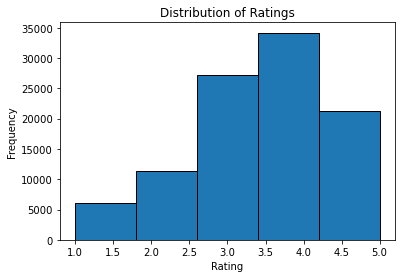

In [16]:
plt.hist(df_ratings['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [17]:
most_rated_movie = df_ratings['movie_id'].value_counts().idxmax()
print(f"The movie rated the greatest number of times is: {most_rated_movie}")

The movie rated the greatest number of times is: 50


In [18]:
most_frequent_5_rating = df_ratings[df_ratings['rating'] == 5]['movie_id'].value_counts().idxmax()
print(f"The movie that received the most '5' rating is: {most_frequent_5_rating}")

The movie that received the most '5' rating is: 50


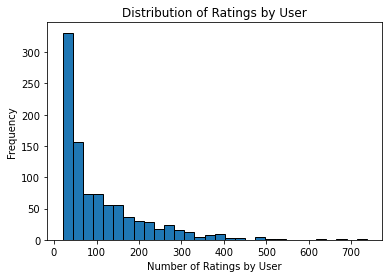

In [19]:
user_rating_counts = df_ratings['user_id'].value_counts()
plt.hist(user_rating_counts, bins=30, edgecolor='black')
plt.xlabel('Number of Ratings by User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings by User')
plt.show()

In [20]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')
most_movies_released_date = df_movies['release_date'].dt.year.value_counts().idxmax()
print(f"The year with the greatest number of movies released is: {most_movies_released_date}")

The year with the greatest number of movies released is: 1996.0


In [21]:
combined_df = pd.merge(df_ratings, df_movies, on='movie_id', how='inner')
print("Sample rows from combined DataFrame:")
print(combined_df.head())

Sample rows from combined DataFrame:
   user_id  movie_id  rating  timestamp         title release_date  \
0      196       242       3  881250949  Kolya (1996)   1997-01-24   
1       63       242       3  875747190  Kolya (1996)   1997-01-24   
2      226       242       5  883888671  Kolya (1996)   1997-01-24   
3      154       242       3  879138235  Kolya (1996)   1997-01-24   
4      306       242       5  876503793  Kolya (1996)   1997-01-24   

   video_release_date                                         imdb_url  
0                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
1                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
2                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
3                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
4                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  


In [22]:
star_wars_ratings = df_ratings[df_ratings['movie_id'] == 50]
num_star_wars_ratings = len(star_wars_ratings)
print(f"The movie 'Star Wars (1977)' was rated {num_star_wars_ratings} times.")

The movie 'Star Wars (1977)' was rated 583 times.


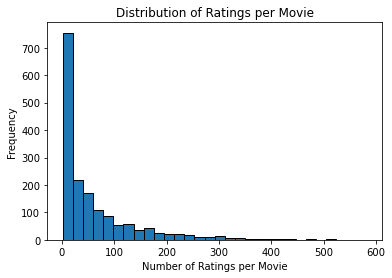

In [23]:
movie_ratings_counts = df_ratings['movie_id'].value_counts()
plt.hist(movie_ratings_counts, bins=30, edgecolor='black')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per Movie')
plt.show()

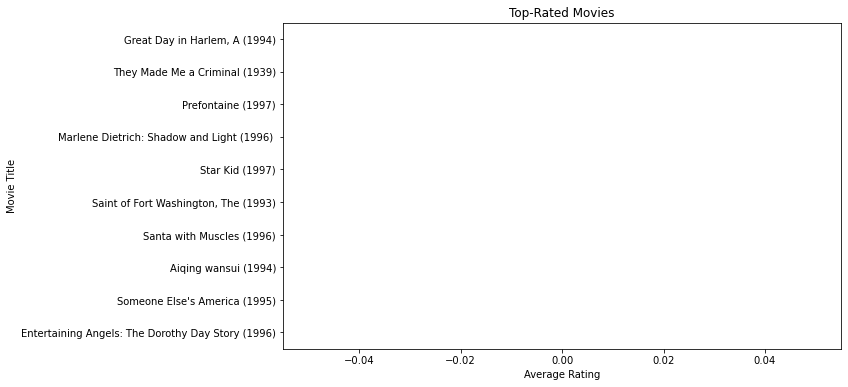

In [24]:
top_rated_movies = df_ratings.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(10)
top_rated_movie_titles = df_movies[df_movies['movie_id'].isin(top_rated_movies.index)]['title']
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies, y=top_rated_movie_titles, orient='h')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top-Rated Movies')
plt.show()

In [24]:
combined_df = pd.merge(combined_df, df_users, on='user_id', how='inner')

In [34]:
movie_ratings_stats = df_ratings.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_ratings_stats.reset_index(inplace=True)

In [35]:
top_rated_popular_movies = movie_ratings_stats[movie_ratings_stats['count'] >= 100].sort_values(by='mean', ascending=False)

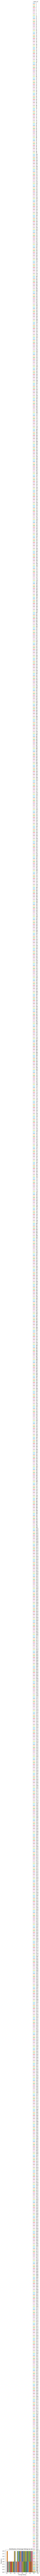

In [63]:
average_rating_by_gender = combined_df.groupby(['gender', 'movie_id'])['rating'].mean().unstack()
average_rating_by_gender.plot(kind='hist', bins=30, alpha=0.5, legend=True)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings by Gender')
plt.show()

In [29]:
occupation_counts = combined_df['occupation'].value_counts().sort_values(ascending=False)

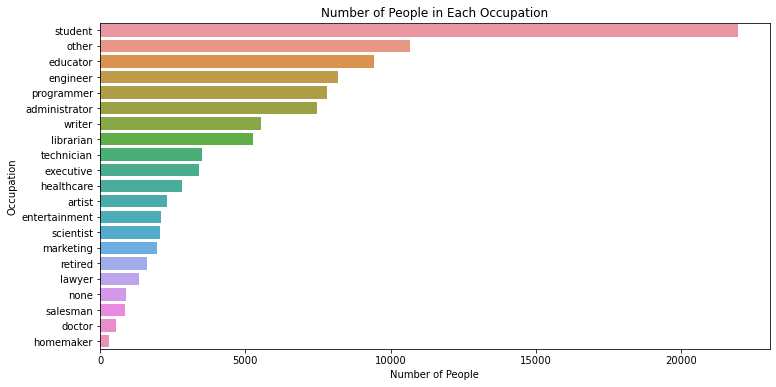

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, orient='h')
plt.xlabel('Number of People')
plt.ylabel('Occupation')
plt.title('Number of People in Each Occupation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


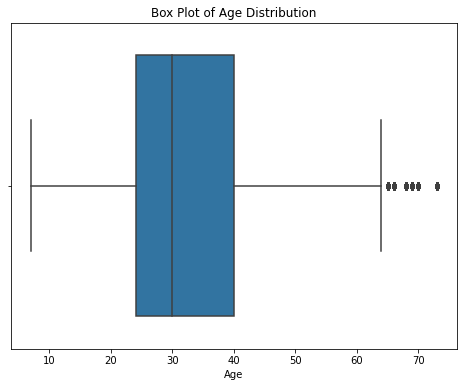

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=combined_df, orient='v')
plt.xlabel('Age')
plt.title('Box Plot of Age Distribution')
plt.show()